In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#Import the classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import f1_score
%matplotlib inline

In [5]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [6]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
header_list=['age','class of worker','industry code','occupation code','education','wage per hour','enrolled in edu inst last wk',
            'marital status','major industry code','major occupation code','race','hispanic Origin','sex','member of a labor union','reason for unemployment',
             'full or part time employment stat','capital gains','capital losses','divdends from stocks','federal income tax liability','tax filer status',
             'region of previous residence','detailed household and family stat','detailed household summary in household',
             'instance weight','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago',
             'migration prev res in sunbelt','family members under 18','total person earnings','country of birth father',
             'country of birth mother','country of birth self','citizenship','total person income',' own business or self employed',
             'veterans benefits','weeks worked in year','year','Label']

In [8]:
def plotInfo(model):
  y_pred = model.predict(X_test)
  print("F1 Score - macro ")
  print(f1_score(y_test, y_pred, average='macro'))
  print("F1 Score - micro")
  print(f1_score(y_test, y_pred, average='micro'))
  print("F1 Score - weighted")
  print(f1_score(y_test, y_pred, average='weighted'))
  y_preds = model.predict_proba(X_test)
  preds = y_preds[:,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, preds)

  auc_score = metrics.auc(fpr, tpr)
  plt.clf()

  plt.title('ROC Curve')
  plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
  plt.plot([0,1],[0,1],'r--')

  plt.xlim([-0.1,1.1])
  plt.ylim([-0.1,1.1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

  plt.legend(loc='lower right')
  plt.show()

In [ ]:

#Initialize the models
def getInfo(X,y):
  X_train=X
  y_train=y
  models = []
  models.append(('DT', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('LR', LogisticRegression()))
  models.append(('RF', RandomForestClassifier()))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('ETC',ExtraTreesClassifier()))

  scores = []
  names = []

#Set up charts to visualize the results
  fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9, 9))
  xAxis = 0
  yAxis = 0

  axes[4, 0].set_title('Mean Accuracy')

  print('Mean accuracy on test data:')

#Train and test each model - save the results
  for name, model in models:
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_test, y_test, cv=6)
    scores.append(score)
    names.append(name)
     
    axes[xAxis, yAxis].set_title(name)
    axes[xAxis, yAxis].plot(['1','2','3','4','5','6'], score, color='C'+str(len(names)-1))
    axes[xAxis, yAxis].set_xlabel("Validation")
    axes[xAxis, yAxis].set_ylabel("Accuracy")
    axes[4, 0].bar(name, score.mean(), alpha=0.4, color='C'+str(len(names)-1))
    axes[4, 0].set_ylim(0.79, 1.0)
    
    if len(names)%2 == 1:
        yAxis += 1
    else:
        xAxis +=1
        yAxis -=1
    print(name)
    y_pred = model.predict(X_test)
    print("F1 Score - macro ")
    print(f1_score(y_test, y_pred, average='macro'))
    print("F1 Score - micro")
    print(f1_score(y_test, y_pred, average='micro'))
    print("F1 Score - weighted")
    print(f1_score(y_test, y_pred, average='weighted'))
#Remove empty chart
  axes[4, 1].remove()

  fig.tight_layout()
  plt.show()

In [9]:
len(header_list)

42

In [10]:
data_dir='/content/gdrive/My Drive/cmpe255_group_proj/'

In [11]:
df=pd.read_csv(data_dir+'census-income.data',sep=',',names=header_list,header=None)
dfTest=pd.read_csv(data_dir+'census-income.test',sep=',',names=header_list,header=None)

In [12]:
df.shape
dfTest.shape

(99762, 42)

In [13]:
print(df.head(20))
print(dfTest.head(20))

    age                  class of worker  ...  year      Label
0    73                  Not in universe  ...    95   - 50000.
1    58   Self-employed-not incorporated  ...    94   - 50000.
2    18                  Not in universe  ...    95   - 50000.
3     9                  Not in universe  ...    94   - 50000.
4    10                  Not in universe  ...    94   - 50000.
5    48                          Private  ...    95   - 50000.
6    42                          Private  ...    94   - 50000.
7    28                          Private  ...    95   - 50000.
8    47                 Local government  ...    95   - 50000.
9    34                          Private  ...    94   - 50000.
10    8                  Not in universe  ...    94   - 50000.
11   32                  Not in universe  ...    95   - 50000.
12   51                          Private  ...    94   - 50000.
13   46                          Private  ...    94   - 50000.
14   26                          Private  ...    95   -

### Data Pre-processing

In [14]:
df.nunique()

age                                           91
class of worker                                9
industry code                                 52
occupation code                               47
education                                     17
wage per hour                               1240
enrolled in edu inst last wk                   3
marital status                                 7
major industry code                           24
major occupation code                         15
race                                           5
hispanic Origin                               10
sex                                            2
member of a labor union                        3
reason for unemployment                        6
full or part time employment stat              8
capital gains                                132
capital losses                               113
divdends from stocks                        1478
federal income tax liability                   6
tax filer status    

In [15]:
df_train=df[['age','class of worker','instance weight','education','enrolled in edu inst last wk','marital status','occupation code','race','sex','capital gains','capital losses','weeks worked in year','country of birth self','Label']]

df_test=dfTest[['age','class of worker','instance weight','education','enrolled in edu inst last wk','marital status','occupation code','race','sex','capital gains','capital losses','weeks worked in year','country of birth self','Label']]


In [16]:
print(df_train.shape)
print(df_test.shape)

(199523, 14)
(99762, 14)


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           199523 non-null  int64  
 1   class of worker               199523 non-null  object 
 2   instance weight               199523 non-null  float64
 3   education                     199523 non-null  object 
 4   enrolled in edu inst last wk  199523 non-null  object 
 5   marital status                199523 non-null  object 
 6   occupation code               199523 non-null  int64  
 7   race                          199523 non-null  object 
 8   sex                           199523 non-null  object 
 9   capital gains                 199523 non-null  int64  
 10  capital losses                199523 non-null  int64  
 11  weeks worked in year          199523 non-null  int64  
 12  country of birth self         199523 non-nul

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           99762 non-null  int64  
 1   class of worker               99762 non-null  object 
 2   instance weight               99762 non-null  float64
 3   education                     99762 non-null  object 
 4   enrolled in edu inst last wk  99762 non-null  object 
 5   marital status                99762 non-null  object 
 6   occupation code               99762 non-null  int64  
 7   race                          99762 non-null  object 
 8   sex                           99762 non-null  object 
 9   capital gains                 99762 non-null  int64  
 10  capital losses                99762 non-null  int64  
 11  weeks worked in year          99762 non-null  int64  
 12  country of birth self         99762 non-null  object 
 13  L

In [19]:
col_list=df_train.columns.tolist()

In [ ]:
# for col in col_list:
#   df_train[col] = df_train[col].astype('str') 

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           199523 non-null  int64  
 1   class of worker               199523 non-null  object 
 2   instance weight               199523 non-null  float64
 3   education                     199523 non-null  object 
 4   enrolled in edu inst last wk  199523 non-null  object 
 5   marital status                199523 non-null  object 
 6   occupation code               199523 non-null  int64  
 7   race                          199523 non-null  object 
 8   sex                           199523 non-null  object 
 9   capital gains                 199523 non-null  int64  
 10  capital losses                199523 non-null  int64  
 11  weeks worked in year          199523 non-null  int64  
 12  country of birth self         199523 non-nul

In [21]:
print(col_list)

['age', 'class of worker', 'instance weight', 'education', 'enrolled in edu inst last wk', 'marital status', 'occupation code', 'race', 'sex', 'capital gains', 'capital losses', 'weeks worked in year', 'country of birth self', 'Label']


In [22]:
df_train.head()

,age,class of worker,instance weight,education,enrolled in edu inst last wk,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,73,Not in universe,1700.09,High school graduate,Not in universe,Widowed,0,White,Female,0,0,0,United-States,- 50000.
1,58,Self-employed-not incorporated,1053.55,Some college but no degree,Not in universe,Divorced,34,White,Male,0,0,52,United-States,- 50000.
2,18,Not in universe,991.95,10th grade,High school,Never married,0,Asian or Pacific Islander,Female,0,0,0,Vietnam,- 50000.
3,9,Not in universe,1758.14,Children,Not in universe,Never married,0,White,Female,0,0,0,United-States,- 50000.
4,10,Not in universe,1069.16,Children,Not in universe,Never married,0,White,Female,0,0,0,United-States,- 50000.


In [23]:
df_train.isna().sum()

age                             0
class of worker                 0
instance weight                 0
education                       0
enrolled in edu inst last wk    0
marital status                  0
occupation code                 0
race                            0
sex                             0
capital gains                   0
capital losses                  0
weeks worked in year            0
country of birth self           0
Label                           0
dtype: int64

### Exploratory Data Analysis

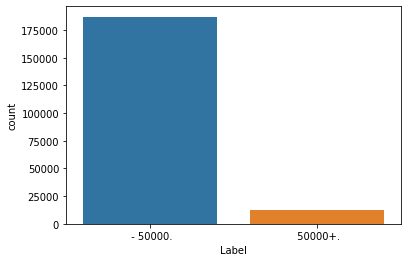

In [24]:
sns.countplot(x="Label", data=df_train)

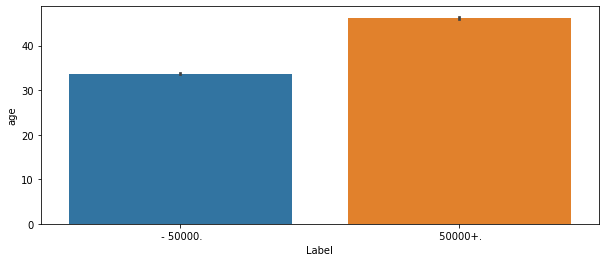

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x="Label", y="age", data=df_train)

In [26]:
df_train['class of worker'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64

In [27]:
num_attributes = df_train.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['age', 'occupation code', 'capital gains', 'capital losses',
       'weeks worked in year'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f195f80c9b0>,
      dtype=object)

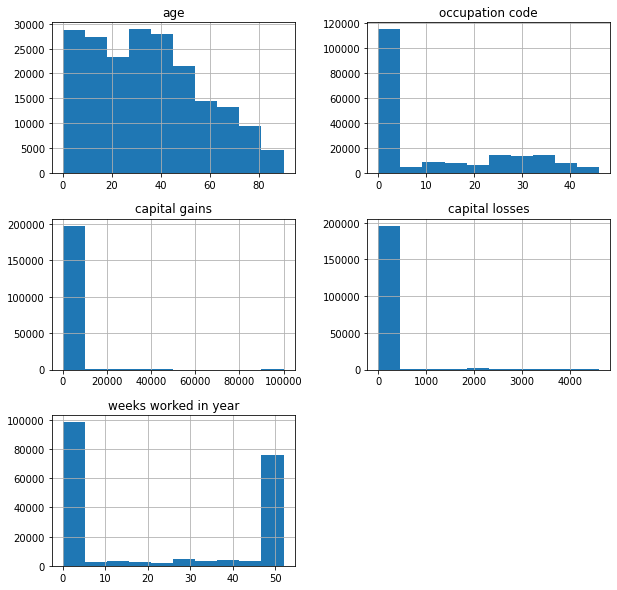

In [28]:
num_attributes.hist(figsize=(10,10))

In [29]:
cat_attributes = df_train.select_dtypes(include=['object'])
print(cat_attributes.columns)


Index(['class of worker', 'education', 'enrolled in edu inst last wk',
       'marital status', 'race', 'sex', 'country of birth self', 'Label'],
      dtype='object')


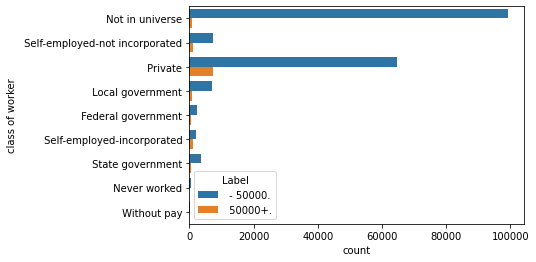

In [30]:
sns.countplot(y='class of worker', hue='Label', data = cat_attributes)

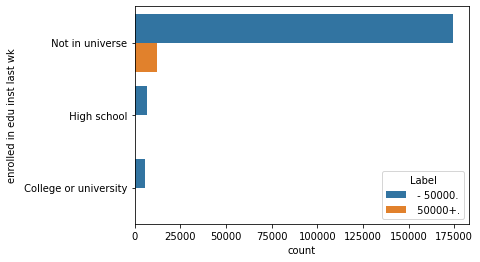

In [31]:
sns.countplot(y='enrolled in edu inst last wk', hue='Label', data = cat_attributes)

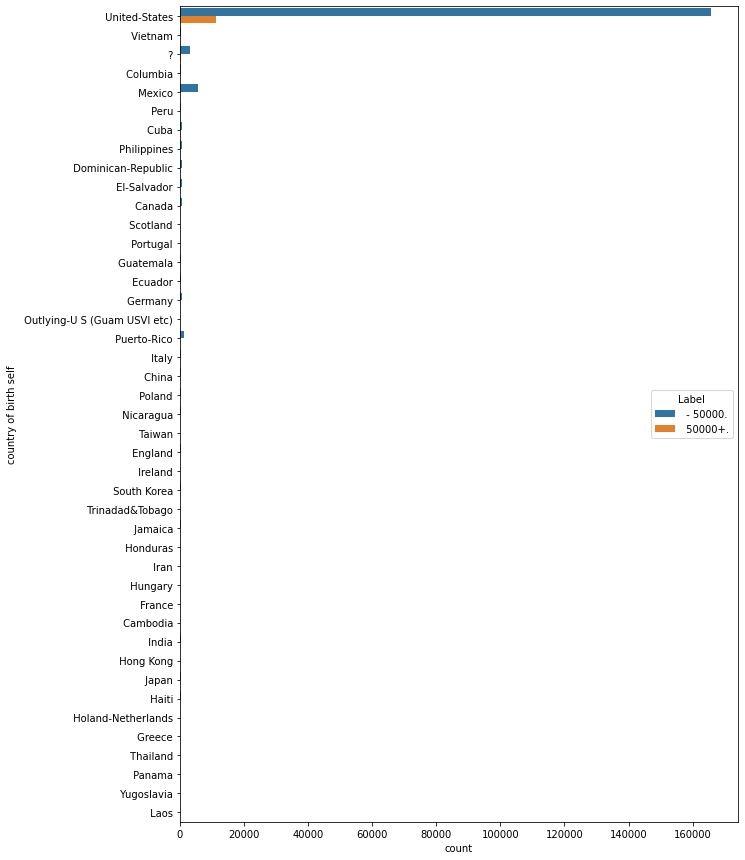

In [32]:
plt.figure(figsize=(10,15))
sns.countplot(y='country of birth self', hue='Label', data = cat_attributes)

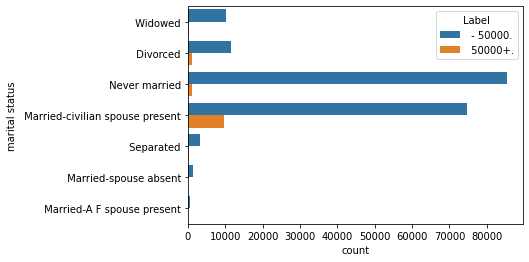

In [33]:
sns.countplot(y='marital status', hue='Label', data = cat_attributes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3393, 0]


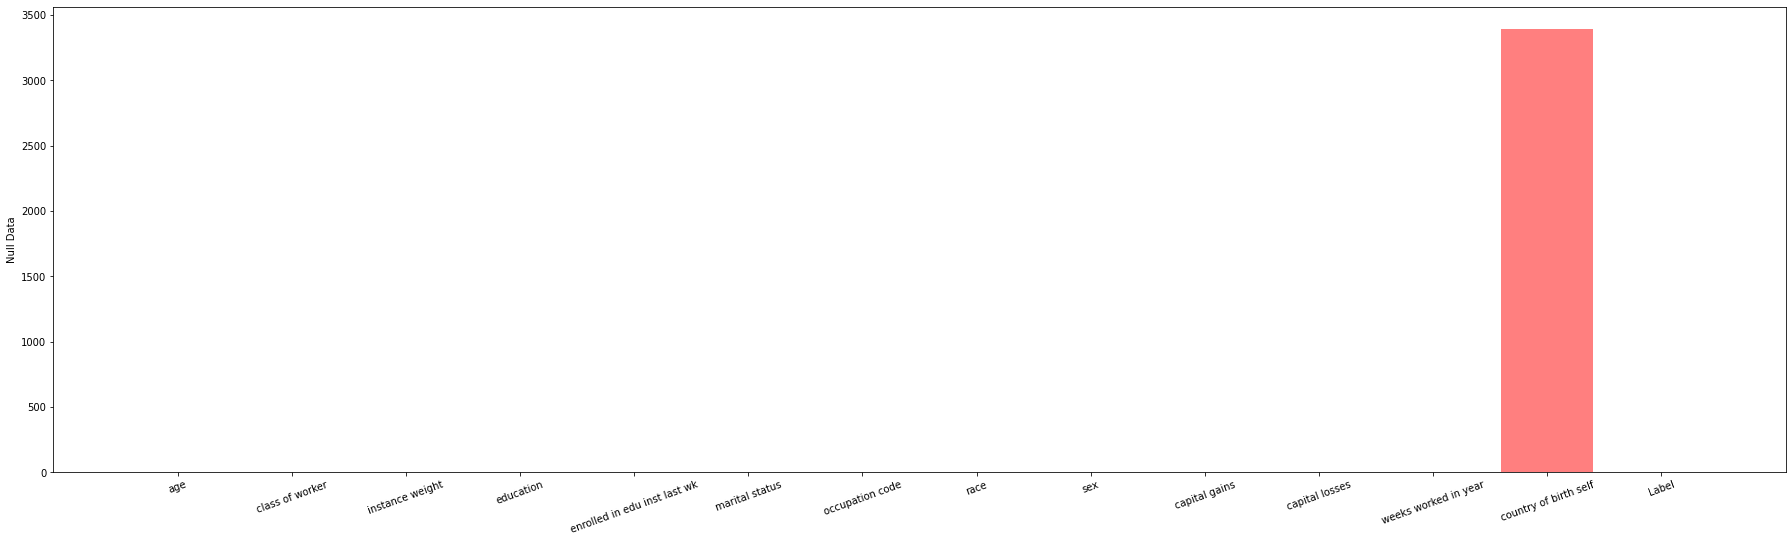

In [35]:
to_visualise = []

#Count the missing values
for col in df_train.columns:
    to_visualise.append(df_train[col].isin([" ?"]).sum())
print(to_visualise)
#Build the plot
fig, ax =  plt.subplots(figsize=(25,7))
x_idx   = np.arange(df_train.shape[1])

ax.bar(x_idx, to_visualise, alpha = 0.5, color = 'r')
ax.set_ylabel('Null Data')
ax.set_xticks(x_idx)
ax.set_xticklabels((df_train.columns))

fig.tight_layout()

plt.xticks(rotation=20)
plt.show()


As the missing values size is less compared to dataset size, dropping the rows of those columns would not affect the data much

199523
3393


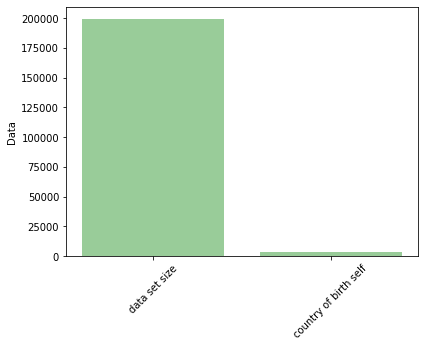

In [36]:
to_plot = [df_train.shape[0], to_visualise[12]]

fig, ax = plt.subplots()
x_val   = np.arange(2)
print(df_train.shape[0])
print(to_visualise[12])
ax.bar(x_val, to_plot, alpha = 0.4, color = 'g')
ax.set_ylabel('Data')
ax.set_xticks(x_val)
ax.set_xticklabels(('data set size','country of birth self'))

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

[0, 100245, 0, 0, 186943, 0, 0, 0, 0, 0, 0, 0, 0, 0]


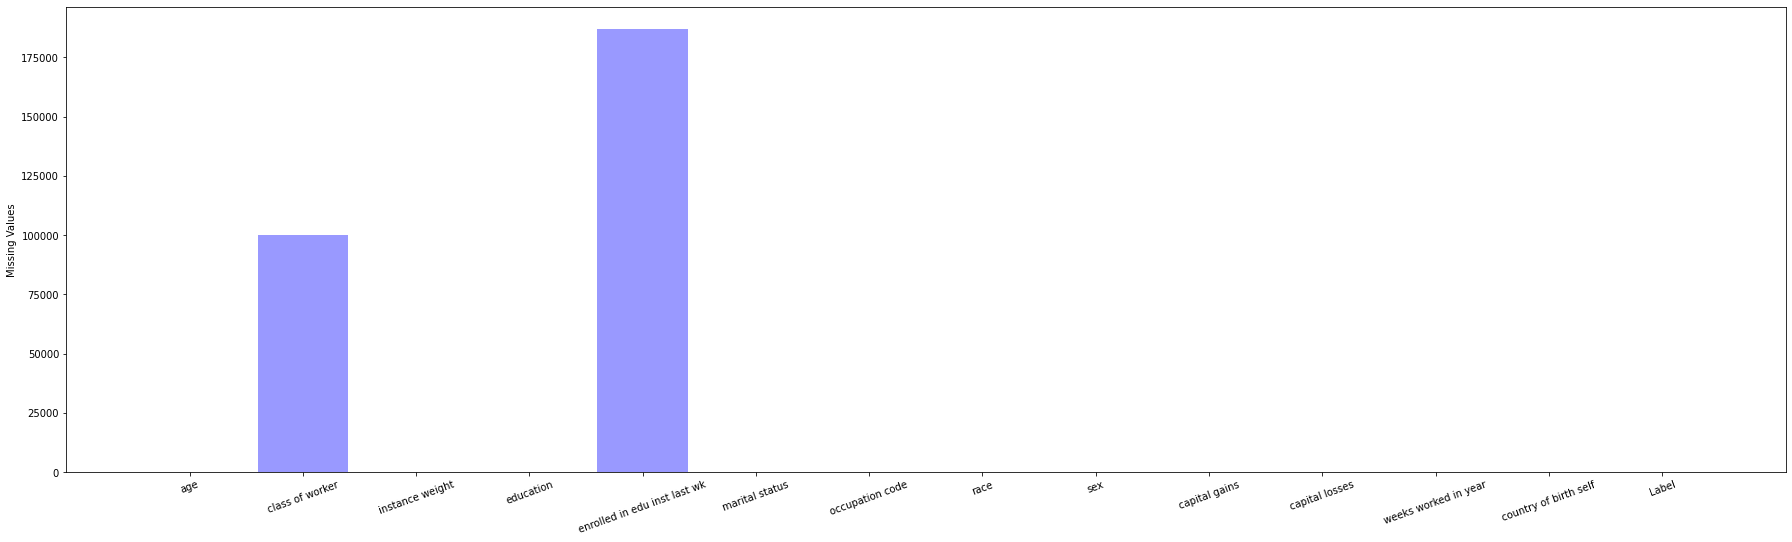

In [37]:
to_visualise = []

#Count the missing values
for col in df_train.columns:
    to_visualise.append(df_train[col].isin([" Not in universe"]).sum())
print(to_visualise)
#Build the plot
fig, ax =  plt.subplots(figsize=(25,7))
x_val   = np.arange(df_train.shape[1])

ax.bar(x_val, to_visualise, alpha = 0.4, color = 'b')
ax.set_ylabel('Missing Values')
ax.set_xticks(x_val)
ax.set_xticklabels((df_train.columns))

fig.tight_layout()

plt.xticks(rotation=20)
plt.show()


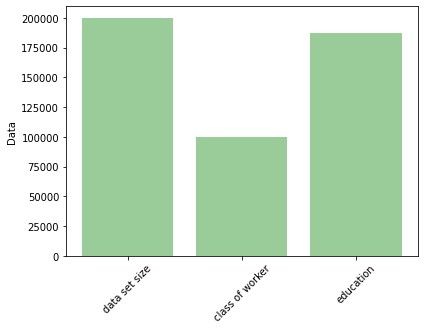

In [38]:
to_plot = [df_train.shape[0], to_visualise[1],to_visualise[4]]

fig, ax = plt.subplots()
x_val   = np.arange(3)
# print(df_train.shape[0])
# print(to_plot[12])
ax.bar(x_val, to_plot, alpha = 0.4, color = 'g')
ax.set_ylabel('Data')
ax.set_xticks(x_val)
ax.set_xticklabels(('data set size','class of worker','education'))

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

In [39]:
df_train['enrolled in edu inst last wk'].value_counts()

 Not in universe          186943
 High school                6892
 College or university      5688
Name: enrolled in edu inst last wk, dtype: int64

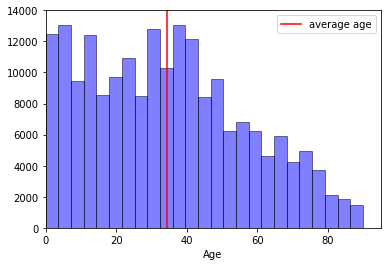

In [40]:
plt.hist(df_train.age, facecolor='blue', alpha=0.5, bins=25, edgecolor='black')
plt.xlabel('Age')
plt.axvline(df_train.age.mean(), color='red', label='average age')
plt.axis([0, 95, 0, 14000])
plt.legend()
plt.show()

In [41]:
df_train['sex'].value_counts()

 Female    103984
 Male       95539
Name: sex, dtype: int64

103984 95539


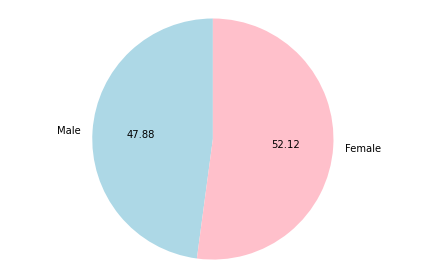

In [42]:
male = 0
female = 0
for person in df_train['sex']:
  if person==' Male':
    male += 1
  elif person==' Female':
    female+= 1
print(female, male)
#Set up pie chart
colors = ['lightblue', 'pink']
to_plot = [male, female] 
labels = ['Male', 'Female'] 
plt.pie(to_plot, labels=labels, colors=colors, startangle=90, autopct='%.2f')
plt.axis('equal')
plt.tight_layout()
plt.show()


Mean: 23.174897129654227


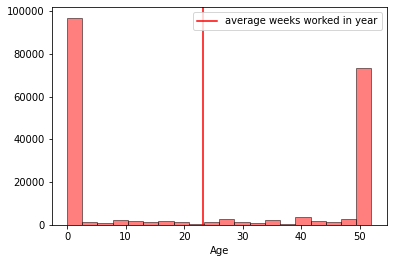

In [43]:
print('Mean:', df_train['weeks worked in year'].mean())
#Set up a histogram
plt.hist(df_train['weeks worked in year'], facecolor='red', alpha=0.5, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.axvline(df_train['weeks worked in year'].mean(), color='red', label='average weeks worked in year')
plt.legend()
plt.show()

In [44]:
df['country of birth self'].value_counts()

 United-States                   176989
 Mexico                            5767
 ?                                 3393
 Puerto-Rico                       1400
 Germany                            851
 Philippines                        845
 Cuba                               837
 Canada                             700
 Dominican-Republic                 690
 El-Salvador                        689
 China                              478
 South Korea                        471
 England                            457
 Columbia                           434
 Italy                              419
 India                              408
 Vietnam                            391
 Poland                             381
 Guatemala                          344
 Japan                              339
 Jamaica                            320
 Peru                               268
 Ecuador                            258
 Haiti                              228
 Nicaragua                          218


In [45]:
df_train['Label'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: Label, dtype: int64

12382 187141


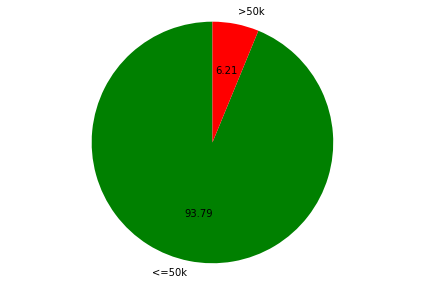

In [46]:
more = 0
less = 0
for i in df_train.Label:
    if i == ' - 50000.':
        less += 1
    if i == ' 50000+.':
        more += 1
print(more,less)
#Set up pie chart
colors = ['green', 'red']
to_plot = [less, more] 
labels = ['<=50k', '>50k'] 
plt.pie(to_plot, labels=labels, colors=colors, startangle=90, autopct='%.2f')
plt.axis('equal')
plt.tight_layout()
plt.show()

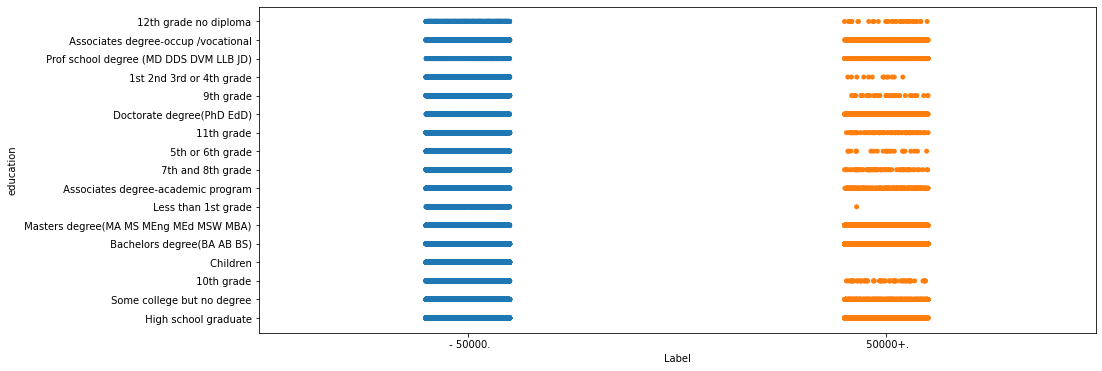

In [47]:
plt.figure(figsize=(15,6))
sns.stripplot(x="Label", y="education", data=df_train)

### Feature Tuning and Data Cleaning

In [ ]:
# Class of worker column cleaning.
counts = df_train['class of worker'].value_counts().reset_index()
counts.columns = ['class of worker', 'count']
print(counts)
df_train.head()

                   class of worker   count
0                  Not in universe  100245
1                          Private   72028
2   Self-employed-not incorporated    8445
3                 Local government    7784
4                 State government    4227
5       Self-employed-incorporated    3265
6               Federal government    2925
7                     Never worked     439
8                      Without pay     165


,age,class of worker,instance weight,education,enrolled in edu inst last wk,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,73,Not in universe,1700.09,High school graduate,Not in universe,Widowed,0,White,Female,0,0,0,United-States,- 50000.
1,58,Self-employed-not incorporated,1053.55,Some college but no degree,Not in universe,Divorced,34,White,Male,0,0,52,United-States,- 50000.
2,18,Not in universe,991.95,10th grade,High school,Never married,0,Asian or Pacific Islander,Female,0,0,0,Vietnam,- 50000.
3,9,Not in universe,1758.14,Children,Not in universe,Never married,0,White,Female,0,0,0,United-States,- 50000.
4,10,Not in universe,1069.16,Children,Not in universe,Never married,0,White,Female,0,0,0,United-States,- 50000.


In [ ]:
df_test.head()

,age,class of worker,instance weight,education,enrolled in edu inst last wk,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,38,Private,1032.38,1st 2nd 3rd or 4th grade,Not in universe,Married-civilian spouse present,36,White,Female,0,0,12,Mexico,- 50000.
1,44,Self-employed-not incorporated,1462.33,Associates degree-occup /vocational,Not in universe,Married-civilian spouse present,12,White,Female,0,0,26,United-States,- 50000.
2,2,Not in universe,1601.75,Children,Not in universe,Never married,0,White,Male,0,0,0,United-States,- 50000.
3,35,Private,1866.88,High school graduate,Not in universe,Divorced,3,White,Female,0,0,52,United-States,- 50000.
4,49,Private,1394.54,High school graduate,Not in universe,Divorced,34,White,Male,0,0,50,United-States,- 50000.


In [ ]:
#Combine the mentioned attributes
df_train['class of worker'].replace('(.*Self-employed.*)','Self-employed',regex=True, inplace = True)
df_train['class of worker'].replace('(.*government.*)','Government',regex=True, inplace = True)
df_train['class of worker'].replace('(.*Never worked.*)','No pay',regex=True, inplace = True)
df_train['class of worker'].replace('(.*Without pay.*)','No pay',regex=True, inplace = True)

counts = df_train['class of worker'].value_counts().reset_index()
counts.columns = ['class of worker', 'count']
print(counts)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


    class of worker   count
0   Not in universe  100245
1           Private   72028
2        Government   14936
3     Self-employed   11710
4            No pay     604


In [ ]:
#Combine the mentioned attributes
df_test['class of worker'].replace('(.*Self-employed.*)','Self-employed',regex=True, inplace = True)
df_test['class of worker'].replace('(.*government.*)','Government',regex=True, inplace = True)
df_test['class of worker'].replace('(.*Never worked.*)','No pay',regex=True, inplace = True)
df_test['class of worker'].replace('(.*Without pay.*)','No pay',regex=True, inplace = True)

counts = df_test['class of worker'].value_counts().reset_index()
counts.columns = ['class of worker', 'count']
print(counts)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


    class of worker  count
0   Not in universe  50079
1           Private  36071
2        Government   7405
3     Self-employed   5928
4            No pay    279


In [ ]:
f = df_train['education'].value_counts().reset_index()
f.columns = ['education', 'count']
print('\n',f)


                                   education  count
0                      High school graduate  48407
1                                  Children  47422
2                Some college but no degree  27820
3                Bachelors degree(BA AB BS)  19865
4                         7th and 8th grade   8007
5                                10th grade   7557
6                                11th grade   6876
7    Masters degree(MA MS MEng MEd MSW MBA)   6541
8                                 9th grade   6230
9       Associates degree-occup /vocational   5358
10       Associates degree-academic program   4363
11                         5th or 6th grade   3277
12                    12th grade no diploma   2126
13                 1st 2nd 3rd or 4th grade   1799
14   Prof school degree (MD DDS DVM LLB JD)   1793
15                Doctorate degree(PhD EdD)   1263
16                      Less than 1st grade    819


In [ ]:
df_train['education'].replace('(.*Children.*)','No-School',regex=True, inplace = True)
df_train['education'].replace('(.*grade.*)','No-School',regex=True, inplace = True)

df_train['education'].replace('(.*Some college but no degree.*)','College',regex=True, inplace = True)
df_train['education'].replace('(.*Associates degree-occup /vocational.*)','College',regex=True, inplace = True)
df_train['education'].replace('(.*Associates degree-academic program.*)','College',regex=True, inplace = True)

f = df_train['education'].value_counts().reset_index()
f.columns = ['education', 'count']
print('\n',f)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,



                                  education  count
0                                No-School  84113
1                     High school graduate  48407
2                                  College  37541
3               Bachelors degree(BA AB BS)  19865
4   Masters degree(MA MS MEng MEd MSW MBA)   6541
5   Prof school degree (MD DDS DVM LLB JD)   1793
6                Doctorate degree(PhD EdD)   1263


In [ ]:
df_test['education'].replace('(.*Children.*)','No-School',regex=True, inplace = True)
df_test['education'].replace('(.*grade.*)','No-School',regex=True, inplace = True)

df_test['education'].replace('(.*Some college but no degree.*)','College',regex=True, inplace = True)
df_test['education'].replace('(.*Associates degree-occup /vocational.*)','College',regex=True, inplace = True)
df_test['education'].replace('(.*Associates degree-academic program.*)','College',regex=True, inplace = True)

f = df_test['education'].value_counts().reset_index()
f.columns = ['education', 'count']
print('\n',f)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,



                                  education  count
0                                No-School  42205
1                     High school graduate  24147
2                                  College  18723
3               Bachelors degree(BA AB BS)   9885
4   Masters degree(MA MS MEng MEd MSW MBA)   3306
5   Prof school degree (MD DDS DVM LLB JD)    876
6                Doctorate degree(PhD EdD)    620


In [ ]:
f = df_train['marital status'].value_counts().reset_index()
f.columns = ['marital status', 'count']
print('\n',f)


                      marital status  count
0                     Never married  86485
1   Married-civilian spouse present  84222
2                          Divorced  12710
3                           Widowed  10463
4                         Separated   3460
5             Married-spouse absent   1518
6        Married-A F spouse present    665


In [ ]:
df_train['marital status'].replace('(.*Married-civilian spouse present.*)', 'Married',regex=True,inplace=True)
df_train['marital status'].replace('(.*Never married.*)', 'Not married',regex=True, inplace=True)
df_train['marital status'].replace('(.*Divorced.*)', 'Separated' ,regex=True, inplace=True)
df_train['marital status'].replace('(.*Separated.*)', 'Separated',regex=True, inplace=True)
df_train['marital status'].replace('(.*Married-spouse absent.*)', 'Married',regex=True, inplace=True)
df_train['marital status'].replace('(.*Married-A F spouse.*)', 'Married',regex=True, inplace=True)

f = df_train['marital status'].value_counts().reset_index()
f.columns = ['marital status', 'count']
print('\n',f)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,



   marital status  count
0    Not married  86485
1        Married  86405
2      Separated  16170
3        Widowed  10463


,age,class of worker,instance weight,education,enrolled in edu inst last wk,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,73,Not in universe,1700.09,High school graduate,Not in universe,Widowed,0,White,Female,0,0,0,United-States,- 50000.
1,58,Self-employed,1053.55,College,Not in universe,Separated,34,White,Male,0,0,52,United-States,- 50000.
2,18,Not in universe,991.95,No-School,High school,Not married,0,Asian or Pacific Islander,Female,0,0,0,Vietnam,- 50000.
3,9,Not in universe,1758.14,No-School,Not in universe,Not married,0,White,Female,0,0,0,United-States,- 50000.
4,10,Not in universe,1069.16,No-School,Not in universe,Not married,0,White,Female,0,0,0,United-States,- 50000.


In [ ]:
df_test['marital status'].replace('(.*Married-civilian spouse present.*)', 'Married',regex=True,inplace=True)
df_test['marital status'].replace('(.*Never married.*)', 'Not married',regex=True, inplace=True)
df_test['marital status'].replace('(.*Divorced.*)', 'Separated' ,regex=True, inplace=True)
df_test['marital status'].replace('(.*Separated.*)', 'Separated',regex=True, inplace=True)
df_test['marital status'].replace('(.*Married-spouse absent.*)', 'Married',regex=True, inplace=True)
df_test['marital status'].replace('(.*Married-A F spouse.*)', 'Married',regex=True, inplace=True)

f = df_test['marital status'].value_counts().reset_index()
f.columns = ['marital status', 'count']
print('\n',f)
df_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,



   marital status  count
0        Married  43148
1    Not married  43143
2      Separated   8146
3        Widowed   5325


,age,class of worker,instance weight,education,enrolled in edu inst last wk,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,38,Private,1032.38,No-School,Not in universe,Married,36,White,Female,0,0,12,Mexico,- 50000.
1,44,Self-employed,1462.33,College,Not in universe,Married,12,White,Female,0,0,26,United-States,- 50000.
2,2,Not in universe,1601.75,No-School,Not in universe,Not married,0,White,Male,0,0,0,United-States,- 50000.
3,35,Private,1866.88,High school graduate,Not in universe,Separated,3,White,Female,0,0,52,United-States,- 50000.
4,49,Private,1394.54,High school graduate,Not in universe,Separated,34,White,Male,0,0,50,United-States,- 50000.


In [ ]:
f = df_train['country of birth self'].value_counts().reset_index()
f.columns = ['country of birth self', 'count']
print('\n',f)


             country of birth self   count
0                   United-States  176989
1                          Mexico    5767
2                               ?    3393
3                     Puerto-Rico    1400
4                         Germany     851
5                     Philippines     845
6                            Cuba     837
7                          Canada     700
8              Dominican-Republic     690
9                     El-Salvador     689
10                          China     478
11                    South Korea     471
12                        England     457
13                       Columbia     434
14                          Italy     419
15                          India     408
16                        Vietnam     391
17                         Poland     381
18                      Guatemala     344
19                          Japan     339
20                        Jamaica     320
21                           Peru     268
22                        Ecuado

In [ ]:
df_train['country of birth self'].replace('(.*Outlying.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Canada.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Panama.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Guatemala.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Honduras.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Nicaragua.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Jamaica.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Haiti.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Cuba.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*United-States.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Mexico.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Puerto-Rico.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*Dominican-Republic.*)', 'North America',regex=True, inplace=True)
df_train['country of birth self'].replace('(.*El-Salvador.*)', 'North America',regex=True, inplace=True)

df_train['country of birth self'] = df_train['country of birth self'].replace(to_replace=['Philippines', 'Laos', 'Cambodia', 'China', 'Vietnam', 'Hong Kong', 'South Korea','India','Japan', 'Taiwan', 'Iran', 'Thailand'], value='Asia', regex=True)
df_train['country of birth self'] = df_train['country of birth self'].replace(to_replace=['Germany','England', 'Holand-Netherlands', 'Yugoslavia', 'Italy', 'Poland', 'Scotland', 'Hungary', 'Portugal','Greece','Ireland','France'], value='Europe', regex=True)
df_train['country of birth self'] = df_train['country of birth self'].replace(to_replace=['Columbia', 'Peru', 'Ecuador', 'Trinadad&Tobago'], value='South America', regex=True)

f = df_train['country of birth self'].value_counts().reset_index()
f.columns = ['country of birth self', 'count']
print('\n',f)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu


   country of birth self   count
0         North America  188473
1                  Asia    3703
2                     ?    3393
3                Europe    2928
4         South America    1026


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_test['country of birth self'].replace('(.*Outlying.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Canada.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Panama.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Guatemala.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Honduras.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Nicaragua.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Jamaica.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Haiti.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Cuba.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*United-States.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Mexico.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Puerto-Rico.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*Dominican-Republic.*)', 'North America',regex=True, inplace=True)
df_test['country of birth self'].replace('(.*El-Salvador.*)', 'North America',regex=True, inplace=True)

df_test['country of birth self'] = df_test['country of birth self'].replace(to_replace=['Philippines', 'Laos', 'Cambodia', 'China', 'Vietnam', 'Hong Kong', 'South Korea','India','Japan', 'Taiwan', 'Iran', 'Thailand'], value='Asia', regex=True)
df_test['country of birth self'] = df_test['country of birth self'].replace(to_replace=['Germany','England', 'Holand-Netherlands', 'Yugoslavia', 'Italy', 'Poland', 'Scotland', 'Hungary', 'Portugal','Greece','Ireland','France'], value='Europe', regex=True)
df_test['country of birth self'] = df_test['country of birth self'].replace(to_replace=['Columbia', 'Peru', 'Ecuador', 'Trinadad&Tobago'], value='South America', regex=True)

f = df_test['country of birth self'].value_counts().reset_index()
f.columns = ['country of birth self', 'count']
print('\n',f)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu


   country of birth self  count
0         North America  94133
1                  Asia   1887
2                     ?   1764
3                Europe   1464
4         South America    514


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_train.drop(df_train[df_train['country of birth self'].str.strip() == '?'].index, inplace = True) 

f = df_train['country of birth self'].value_counts().reset_index()
f.columns = ['country of birth self', 'count']
print('\n',f)


   country of birth self   count
0         North America  188473
1                  Asia    3703
2                Europe    2928
3         South America    1026


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test.drop(df_train[df_train['country of birth self'].str.strip() == '?'].index, inplace = True) 

f = df_test['country of birth self'].value_counts().reset_index()
f.columns = ['country of birth self', 'count']
print('\n',f)


   country of birth self  count
0         North America  94133
1                  Asia   1887
2                     ?   1764
3                Europe   1464
4         South America    514


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
f = df_train['race'].value_counts().reset_index()
f.columns = ['race', 'count']
print('\n',f)

f = df_train['sex'].value_counts().reset_index()
f.columns = ['sex', 'count']
print('\n',f)

# have managable values. so not tuning it


                            race   count
0                         White  164977
1                         Black   20008
2     Asian or Pacific Islander    5410
3                         Other    3487
4   Amer Indian Aleut or Eskimo    2248

        sex   count
0   Female  102267
1     Male   93863


In [ ]:
f = df_test['race'].value_counts().reset_index()
f.columns = ['race', 'count']
print('\n',f)

f = df_test['sex'].value_counts().reset_index()
f.columns = ['sex', 'count']
print('\n',f)

# have managable values. so not tuning it


                            race  count
0                         White  83613
1                         Black  10124
2     Asian or Pacific Islander   2913
3                         Other   1903
4   Amer Indian Aleut or Eskimo   1209

        sex  count
0   Female  51791
1     Male  47971


In [ ]:
#Drop the columns not needed
df_train.drop(columns=['enrolled in edu inst last wk'], axis=1, inplace=True)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.


In [ ]:
#Drop the columns not needed
df_test.drop(columns=['enrolled in edu inst last wk'], axis=1, inplace=True)
df_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.


In [ ]:
print('dataset size')
print('# of rows:', df_train.shape[0])
print('# of columns:', df_train.shape[1])
df_train.head()

dataset size
# of rows: 196130
# of columns: 13


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.


In [ ]:
print('dataset size')
print('# of rows:', df_test.shape[0])
print('# of columns:', df_test.shape[1])
df_test.head()

dataset size
# of rows: 99762
# of columns: 13


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.


### Converting categorical attributes into numerical values

In [ ]:
df_train["class of worker"] = df_train["class of worker"].astype('category')
df_train.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age                         int64
class of worker          category
instance weight           float64
education                  object
marital status             object
occupation code             int64
race                       object
sex                        object
capital gains               int64
capital losses              int64
weeks worked in year        int64
country of birth self      object
Label                      object
dtype: object

In [ ]:
df_test["class of worker"] = df_test["class of worker"].astype('category')
df_test.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age                         int64
class of worker          category
instance weight           float64
education                  object
marital status             object
occupation code             int64
race                       object
sex                        object
capital gains               int64
capital losses              int64
weeks worked in year        int64
country of birth self      object
Label                      object
dtype: object

In [ ]:
df_train["class_of_worker_cat"] = df_train["class of worker"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0


In [ ]:
df_test["class_of_worker_cat"] = df_test["class of worker"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1


In [ ]:
df_train["education"] = df_train["education"].astype('category')
# df_train.dtypes
df_train["education_cat"] = df_train["education"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6


In [ ]:
df_test["education"] = df_test["education"].astype('category')
# df_train.dtypes
df_test["education_cat"] = df_test["education"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2


In [ ]:
df_train["marital status"] = df_train["marital status"].astype('category')
# df_train.dtypes
df_train["marital_status_cat"] = df_train["marital status"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2,0
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5,3
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6,2
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2


In [ ]:
df_test["marital status"] = df_test["marital status"].astype('category')
# df_train.dtypes
df_test["marital_status_cat"] = df_test["marital status"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6,1
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5,1
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6,2
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2,3
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2,3


In [ ]:
df_train["race"] = df_train["race"].astype('category')
# df_train.dtypes
df_train["race_cat"] = df_train["race"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2,0,4
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5,3,4
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6,2,1
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4


In [ ]:
df_test["race"] = df_test["race"].astype('category')
# df_train.dtypes
df_test["race_cat"] = df_test["race"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6,1,4
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5,1,4
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6,2,4
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2,3,4
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2,3,4


In [ ]:
df_train["sex"] = df_train["sex"].astype('category')
# df_train.dtypes
df_train["sex_cat"] = df_train["sex"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2,0,4,0
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5,3,4,1
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6,2,1,0
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0


In [ ]:
df_test["sex"] = df_test["sex"].astype('category')
# df_train.dtypes
df_test["sex_cat"] = df_test["sex"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6,1,4,0
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5,1,4,0
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6,2,4,1
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2,3,4,0
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2,3,4,1


In [ ]:
df_train["country of birth self"] = df_train["country of birth self"].astype('category')
# df_train.dtypes
df_train["country_of_birth_self_cat"] = df_train["country of birth self"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2,0,4,0,3
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5,3,4,1,3
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6,2,1,0,0
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0,3
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0,3


In [ ]:
df_test["country of birth self"] = df_test["country of birth self"].astype('category')
# df_train.dtypes
df_test["country_of_birth_self_cat"] = df_test["country of birth self"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6,1,4,0,4
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5,1,4,0,4
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6,2,4,1,4
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2,3,4,0,4
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2,3,4,1,4


In [ ]:
df_train["Label"] = df_train["Label"].astype('category')
# df_train.dtypes
df_train["Label_cat"] = df_train["Label"].cat.codes
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat,Label_cat
0,73,Not in universe,1700.09,High school graduate,Widowed,0,White,Female,0,0,0,North America,- 50000.,0,2,0,4,0,3,0
1,58,Self-employed,1053.55,College,Separated,34,White,Male,0,0,52,North America,- 50000.,4,5,3,4,1,3,0
2,18,Not in universe,991.95,No-School,Not married,0,Asian or Pacific Islander,Female,0,0,0,Asia,- 50000.,0,6,2,1,0,0,0
3,9,Not in universe,1758.14,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0,3,0
4,10,Not in universe,1069.16,No-School,Not married,0,White,Female,0,0,0,North America,- 50000.,0,6,2,4,0,3,0


In [ ]:
df_test["Label"] = df_test["Label"].astype('category')
# df_test.dtypes
df_test["Label_cat"] = df_test["Label"].cat.codes
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,class of worker,instance weight,education,marital status,occupation code,race,sex,capital gains,capital losses,weeks worked in year,country of birth self,Label,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat,Label_cat
0,38,Private,1032.38,No-School,Married,36,White,Female,0,0,12,North America,- 50000.,1,6,1,4,0,4,0
1,44,Self-employed,1462.33,College,Married,12,White,Female,0,0,26,North America,- 50000.,4,5,1,4,0,4,0
2,2,Not in universe,1601.75,No-School,Not married,0,White,Male,0,0,0,North America,- 50000.,0,6,2,4,1,4,0
3,35,Private,1866.88,High school graduate,Separated,3,White,Female,0,0,52,North America,- 50000.,1,2,3,4,0,4,0
4,49,Private,1394.54,High school graduate,Separated,34,White,Male,0,0,50,North America,- 50000.,1,2,3,4,1,4,0


In [ ]:
to_drop=['class of worker','education','marital status','race','sex','country of birth self','Label']
df_train=df_train.drop(to_drop,axis=1)
df_train.head()

,age,instance weight,occupation code,capital gains,capital losses,weeks worked in year,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat,Label_cat
0,73,1700.09,0,0,0,0,0,2,0,4,0,3,0
1,58,1053.55,34,0,0,52,4,5,3,4,1,3,0
2,18,991.95,0,0,0,0,0,6,2,1,0,0,0
3,9,1758.14,0,0,0,0,0,6,2,4,0,3,0
4,10,1069.16,0,0,0,0,0,6,2,4,0,3,0


In [ ]:
to_drop=['class of worker','education','marital status','race','sex','country of birth self','Label']
df_test=df_test.drop(to_drop,axis=1)
df_test.head()

,age,instance weight,occupation code,capital gains,capital losses,weeks worked in year,class_of_worker_cat,education_cat,marital_status_cat,race_cat,sex_cat,country_of_birth_self_cat,Label_cat
0,38,1032.38,36,0,0,12,1,6,1,4,0,4,0
1,44,1462.33,12,0,0,26,4,5,1,4,0,4,0
2,2,1601.75,0,0,0,0,0,6,2,4,1,4,0
3,35,1866.88,3,0,0,52,1,2,3,4,0,4,0
4,49,1394.54,34,0,0,50,1,2,3,4,1,4,0


### Splitting data for training

In [ ]:
X=df_train.drop('Label_cat',axis=1)
y=df_train['Label_cat']
X.shape

(196130, 12)

In [ ]:
X_test=df_test.drop('Label_cat',axis=1)
y_test=df_test['Label_cat']
X_test.shape

(99762, 12)

### Using SMOTE to handle imbalanced data

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(368090, 12)

### Model Experiments

In [ ]:
def plotInfo(model):
  y_pred = model.predict(X_test)
  print("F1 Score - macro ")
  print(f1_score(y_test, y_pred, average='macro'))
  print("F1 Score - micro")
  print(f1_score(y_test, y_pred, average='micro'))
  print("F1 Score - weighted")
  print(f1_score(y_test, y_pred, average='weighted'))
  y_preds = model.predict_proba(X_test)
  preds = y_preds[:,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, preds)

  auc_score = metrics.auc(fpr, tpr)
  plt.clf()

  plt.title('ROC Curve')
  plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
  plt.plot([0,1],[0,1],'r--')

  plt.xlim([-0.1,1.1])
  plt.ylim([-0.1,1.1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

  plt.legend(loc='lower right')
  plt.show()

In [ ]:

#Initialize the models
def getInfo(X,y):
  X_train=X
  y_train=y
  models = []
  models.append(('DT', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('LR', LogisticRegression()))
  models.append(('RF', RandomForestClassifier()))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('ETC',ExtraTreesClassifier()))

  scores = []
  names = []

#Set up charts to visualize the results
  fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9, 9))
  xAxis = 0
  yAxis = 0

  axes[4, 0].set_title('Mean Accuracy')

  print('Mean accuracy on test data:')

#Train and test each model - save the results
  for name, model in models:
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_test, y_test, cv=6)
    scores.append(score)
    names.append(name)
     
    axes[xAxis, yAxis].set_title(name)
    axes[xAxis, yAxis].plot(['1','2','3','4','5','6'], score, color='C'+str(len(names)-1))
    axes[xAxis, yAxis].set_xlabel("Validation")
    axes[xAxis, yAxis].set_ylabel("Accuracy")
    axes[4, 0].bar(name, score.mean(), alpha=0.4, color='C'+str(len(names)-1))
    axes[4, 0].set_ylim(0.79, 1.0)
    
    if len(names)%2 == 1:
        yAxis += 1
    else:
        xAxis +=1
        yAxis -=1
    print(name)
    y_pred = model.predict(X_test)
    print("F1 Score - macro ")
    print(f1_score(y_test, y_pred, average='macro'))
    print("F1 Score - micro")
    print(f1_score(y_test, y_pred, average='micro'))
    print("F1 Score - weighted")
    print(f1_score(y_test, y_pred, average='weighted'))
#Remove empty chart
  axes[4, 1].remove()

  fig.tight_layout()
  plt.show()

Mean accuracy on test data:
DT
F1 Score - macro 
0.6904077255457477
F1 Score - micro
0.9241394518955113
F1 Score - weighted
0.9260485225474995
NB
F1 Score - macro 
0.6730218379252494
F1 Score - micro
0.888965738457529
F1 Score - weighted
0.9057915327375287
KNN
F1 Score - macro 
0.6299568752588205
F1 Score - micro
0.8427357109921614
F1 Score - weighted
0.8757597603562659


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR
F1 Score - macro 
0.6079961587720104
F1 Score - micro
0.7978488803351977
F1 Score - weighted
0.8469698914323147
RF
F1 Score - macro 
0.7461132415062006
F1 Score - micro
0.9479461117459553
F1 Score - weighted
0.9444086077301286
LDA
F1 Score - macro 
0.6212287612930008
F1 Score - micro
0.8072713057075841
F1 Score - weighted
0.8537653111505523
ETC
F1 Score - macro 
0.737802822242617
F1 Score - micro
0.942402918947094
F1 Score - weighted
0.9406941647636012


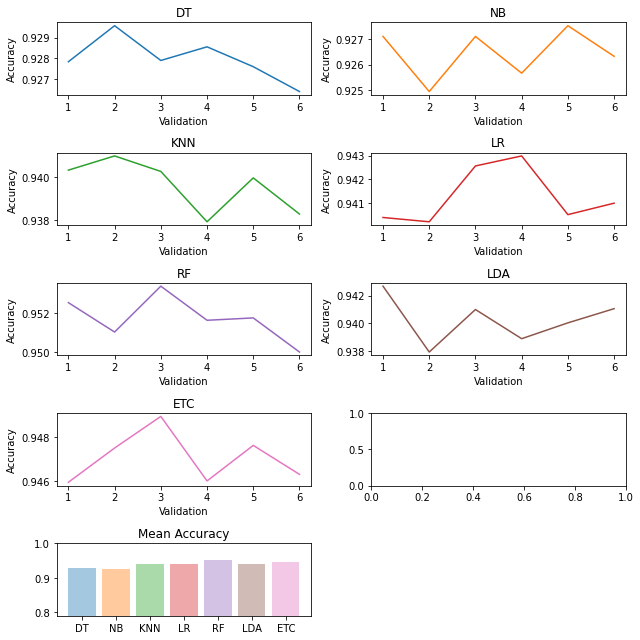

In [ ]:
getInfo(X_res,y_res)

In [ ]:

#Construct pipelines
X_train=X_res
y_train=y_res
pipe1 = Pipeline((('DT', DecisionTreeClassifier()),))
pipe2 = Pipeline((('RF', RandomForestClassifier()),))

#Define parameters for each pipeline
para1 = {
    'DT__criterion' : ['gini', 'entropy'],
    'DT__splitter': ['best', 'random'],
    'DT__min_samples_leaf': [1, 2, 5],
    'DT__min_samples_split': [2, 5, 10]
}
para2 = {
    'RF__n_estimators': [5, 10, 50],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
    'RF__max_depth': [1, 5, 10],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 5]
}


paras = [ para1, para2]
pipes = [ pipe1, pipe2]


for i in range(len(pipes)):
    print('GridSearch for model', i)
    grid = GridSearchCV(pipes[i], paras[i], verbose=1, refit=False, n_jobs=-1)
    grid = grid.fit(X_train, y_train)
    print('Finished GridSearch\n')
    print('Best score:', grid.best_score_)
    print(grid.best_params_, '\n\n')


GridSearch for model 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Finished GridSearch

Best score: 0.9569072781113315
{'DT__criterion': 'entropy', 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2, 'DT__splitter': 'best'} 


GridSearch for model 1
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 28.7min


Finished GridSearch

Best score: 0.9419245293270666
{'RF__max_depth': 10, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 50} 




[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 63.5min finished


### Building Model pipeline to find best hyper-parameters

F1 Score
0.713922517516442
0.905234458010064
0.9188543711083818
F1 Score - macro 
0.713922517516442
F1 Score - micro
0.905234458010064
F1 Score - weighted
0.9188543711083818


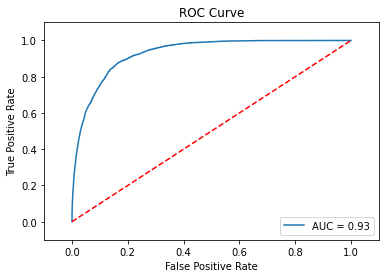

In [ ]:
model=RandomForestClassifier(max_depth=10,max_features='log2', min_samples_leaf= 5,min_samples_split=2,n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
plotInfo(model)


F1 Score
0.716498549452453
0.9389446883582928
0.9364803086551298
F1 Score - macro 
0.716498549452453
F1 Score - micro
0.9389446883582928
F1 Score - weighted
0.9364803086551298


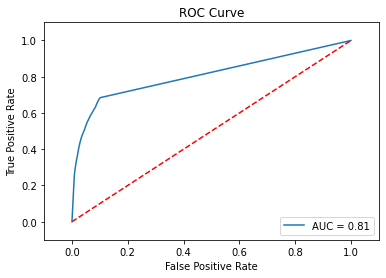

In [ ]:

model=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, min_samples_split=2, splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
plotInfo(model)

F1 Score
0.7451752909381619
0.9469938453519376
0.9438295617387731
F1 Score - macro 
0.7451752909381619
F1 Score - micro
0.9469938453519376
F1 Score - weighted
0.9438295617387731


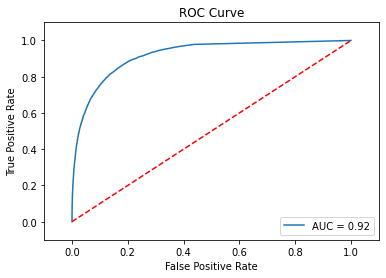

In [ ]:

model=ExtraTreesClassifier(class_weight='balanced_subsample', max_features=None,min_samples_split=5, n_estimators=400, random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
plotInfo(model)